# Import Libraries

In [1]:
%matplotlib inline
from _context import *

import sys
sys.path.append("..")

from _context import *
from src.plotting import *
from src.rl import ActorCritic
from src.environments import TMaze
from src.memristor import *
from datetime import datetime
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.stats import norm

font_size=12
#Plot Size----------
params = {'figure.figsize': (8/2.54,4/2.54),
          #'figure.figsize': (11/2.54,7/2.54),
          'legend.fontsize': str(font_size-1), #otherwise huge legend
          'axes.labelsize': str(font_size),
          'axes.titlesize': str(font_size),
          'xtick.labelsize':str(font_size-1), #was font_size-1
          'ytick.labelsize':str(font_size-1)} #was font_size-1}
pylab.rcParams.update(params)


def save_data(name, memristors, states, logs, RL_settings, path, e):

    RL_settings = update_saveparams(memristors, states, RL_settings)
    
    now = datetime.now()
    date= now.strftime("%Y%m%d")
    time= now.strftime("%H%M%S")
    os.makedirs(path,exist_ok=True)
    path = path+date+time+name+"_Episode"+str(e)
    path_logs = path+'_logs'
    # path_params = path+'_params'
    logs.to_pickle(path_logs)
    with open(path_params, 'wb') as f:
        pickle.dump(RL_settings, f)
    print('saved')
    
#Note: Instance variables are only available if different from Class -> if default use Memristor params
def update_saveparams(memristors, states, RL_settings):
    all_params=[[0,[0,0]] for i in range(len(states))]
    for m,parameters in zip(memristors,all_params):
        #Critic
        params={
            'N':0, #number of pulses to max conductance
            'alpha_set':0, #parameter nonlinear update fct
            'beta_set':0, #parameter nonlinear update fct
            'alpha_reset':0, #parameter nonlinear update fct
            'beta_reset':0, #parameter nonlinear update fct
            'G0':0,
            'G1':0,
            'ID':"",
            'std_noise_set':0.0,
            'std_noise_reset':0.0,
            'alpha_noise_set':0, 
            'beta_noise_set':0,
            'gamma_noise_set':0,
            'zeta_noise_set':0,
            'alpha_noise_reset':0,
            'beta_noise_reset':0,
            'gamma_noise_reset':0,
            'zeta_noise_reset':0,
            'wf_write':{},
            'wf_read':{},
            'meas_dict_read':{},
            'meas_dict_write':{},
        }

        # if set(params)<=set(vars(m[0])): #check if the params are different from default class variables
        params.update((k, vars(m[0])[k]) for k in params.keys() & vars(m[0]).keys())
        parameters[0]=params

        #Actor 1
        params={
            'N':0, #number of pulses to max conductance
            'alpha_set':0, #parameter nonlinear update fct
            'beta_set':0, #parameter nonlinear update fct
            'alpha_reset':0, #parameter nonlinear update fct
            'beta_reset':0, #parameter nonlinear update fct
            'G0':0,
            'G1':0,
            'ID':"",
            'std_noise_set':0.0,
            'std_noise_reset':0.0,
            'alpha_noise_set':0, 
            'beta_noise_set':0,
            'gamma_noise_set':0,
            'zeta_noise_set':0,
            'alpha_noise_reset':0,
            'beta_noise_reset':0,
            'gamma_noise_reset':0,
            'zeta_noise_reset':0,
            'wf_write':{},
            'wf_read':{},
            'meas_dict_read':{},
            'meas_dict_write':{},
        }
        params.update((k, vars(m[1][0])[k]) for k in params.keys() & vars(m[1][0]).keys())
        parameters[1][0]=params

        #Actor 2
        params={
            'N':0, #number of pulses to max conductance
            'alpha_set':0, #parameter nonlinear update fct
            'beta_set':0, #parameter nonlinear update fct
            'alpha_reset':0, #parameter nonlinear update fct
            'beta_reset':0, #parameter nonlinear update fct
            'G0':0,
            'G1':0,
            'ID':"",
            'std_noise_set':0.0,
            'std_noise_reset':0.0,
            'alpha_noise_set':0, 
            'beta_noise_set':0,
            'gamma_noise_set':0,
            'zeta_noise_set':0,
            'alpha_noise_reset':0,
            'beta_noise_reset':0,
            'gamma_noise_reset':0,
            'zeta_noise_reset':0,
            'wf_write':{},
            'wf_read':{},
            'meas_dict_read':{},
            'meas_dict_write':{},
        }
        params.update((k, vars(m[1][1])[k]) for k in params.keys() & vars(m[1][1]).keys())
        parameters[1][1]=params


    dict_all_params={
        'params':all_params
    }
    RL_settings.update(dict_all_params)
    return RL_settings

def get_device_name(word):
    start_string = "_D"
    end_string = "__"

    # Find the indexes of the given letters in the string
    index_start = word.find(start_string)
    index_stop = word.find(end_string)

    if (index_start != -1) or (index_stop != -1):
        # Extract the part of the string starting from the given letter
        result = word[index_start+1:index_stop]
    else:
        print("The given letter was not found in the string.")
    return result

def get_actor_critic_ID(word):
    start_string = "__"
    end_string = ".j"
    # Find the indexes of the given letters in the string
    index_start = word.find(start_string)
    index_stop = word.find(end_string)

    if (index_start != -1) or (index_stop != -1):
        # Extract the part of the string starting from the given letter
        result = word[index_start+2:index_stop]
    else:
        print("The given letter was not found in the string.")
    return result

# Load in all Memristors

## Create a Model per Memristor

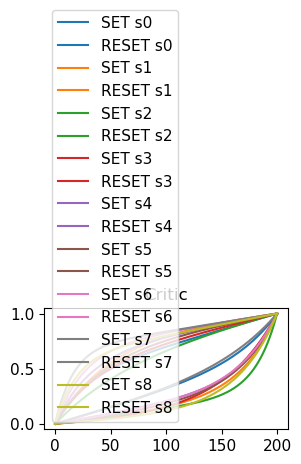

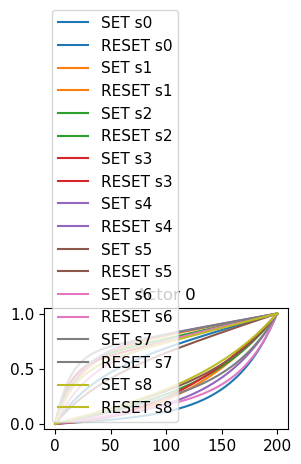

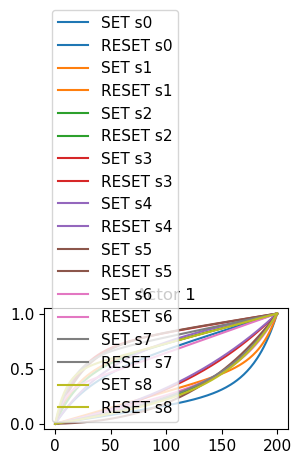

--State 0 --
Critic  G0: 41.15675449928249 [uS] G1: 57.36892307541373 [uS] ID: D600_R6_B40
Actor 0 G0: 34.71756989284818 [uS] G1: 56.47367429433287 [uS] ID: D600_R7_B31
Actor 1 G0: 25.20487312805986 [uS] G1: 41.748464289635535 [uS] ID: D600_R6_B37
--State 1 --
Critic  G0: 36.135028032449476 [uS] G1: 56.72478875545018 [uS] ID: D600_R6_B28
Actor 0 G0: 33.444853781912855 [uS] G1: 48.60728179914694 [uS] ID: D600_R5_B40
Actor 1 G0: 32.036259775512626 [uS] G1: 45.12903364803895 [uS] ID: D600_R7_B36
--State 2 --
Critic  G0: 37.914087372925984 [uS] G1: 59.078354682268326 [uS] ID: D600_R9_B23
Actor 0 G0: 39.65724081149815 [uS] G1: 51.45079852750065 [uS] ID: D600_R5_B32
Actor 1 G0: 30.446086187130398 [uS] G1: 50.01604729886976 [uS] ID: D600_R4_B32
--State 3 --
Critic  G0: 31.842466859378288 [uS] G1: 55.30960342277108 [uS] ID: D600_R4_B35
Actor 0 G0: 39.307907748664086 [uS] G1: 55.189191374112944 [uS] ID: D600_R7_B30
Actor 1 G0: 44.618743009623145 [uS] G1: 57.556405753188336 [uS] ID: D600_R7_B29


In [52]:
plt.close('all')

n_states=9
actions=2
critics=1
hw_states=[] # Load in all (first run with memristors)

#init class for each memristor
memristors=[[Memristor(),[Memristor(),Memristor()]] for i in range(n_states)] #memristors[state][0=Critic or 1=Actor][if actor which of two actions] #memristors=[[[],[]]]*n_states does not work!!!!

#---------------------SW Memristors------------------------------------------------------------------------
directory='../memristor_data/indexing_Tmaze/'

files=os.listdir(directory)
filenames=sorted(fnmatch.filter(files,'*.json'),key=get_actor_critic_ID)

#Check if number of files = (actions+critic)*states
assert len(filenames) == (actions+critics)*n_states, "Number of files does not match number of total weights!"

fig1,ax1=plt.subplots()
fig2,ax2=plt.subplots()
fig3,ax3=plt.subplots()

c_idx, a_idx = 0, 0

#Iterate through files and assign memristors to actors/critics
for i,filename in enumerate(filenames):
    pathfull = directory+'/'+filename     
    params={
        'N':0, #number of pulses to max conductance
        'ID':"",
        'G0':0,
        'G1':0,

        'alpha_set':0, #parameter nonlinear update fct
        'beta_set':0, #parameter nonlinear update fct
        'alpha_reset':0, #parameter nonlinear update fct
        'beta_reset':0, #parameter nonlinear update fct
        
        'alpha_noise_set':0, 
        'beta_noise_set':0,
        'gamma_noise_set':0,
        'zeta_noise_set':0,
        'alpha_noise_reset':0,
        'beta_noise_reset':0,
        'gamma_noise_reset':0,
        'zeta_noise_reset':0,

        'std_noise_set':0.0,
        'std_noise_reset':0.0,
        'std_noise_set_cycle':np.array([]),
        'std_noise_reset_cycle':np.array([]),

        'sign_counter': 0,
        'update_sign': None, #sign of last update: +1 for positive update, -1 for negative 
        'count_direction': 'up',
        'cycle': None,

    }
    
    file_ID = get_actor_critic_ID(filename) 
    #Assign critic memristors
    if c_idx < critics * n_states:    
        critic_idx = int(file_ID[1:])
        
        if file_ID.startswith('C'):
            #Assign the device ID to the model
            memristors[critic_idx][0].ID = get_device_name(filename)

            with open(pathfull) as json_data:
                data = json.load(json_data)

            params.update((k, data[k]) for k in params.keys() & data.keys()) #update all values in params with characterization
            memristors[critic_idx][0].update_params(params)
            x=np.arange(memristors[critic_idx][0].N+1)
            ax1.plot(x,memristors[critic_idx][0].Lin_Exp_Set(x),label=f'SET s{critic_idx}',c=f'C{critic_idx}')
            ax1.plot(x,memristors[critic_idx][0].Lin_Exp_Reset(x),label=f'RESET s{critic_idx}',c=f'C{critic_idx}')
            c_idx += 1

            
    #Assign actor memristors (1 to n)
    if a_idx < actions * n_states:
        if file_ID.startswith('A'):
            parts = file_ID.split('_')
            actor_idx = int(parts[0][1:])
            actor_subidx = int(parts[1])

            #Assign the device ID to the model
            memristors[actor_idx][1][actor_subidx].ID = get_device_name(filename)

            with open(pathfull) as json_data:
                data = json.load(json_data)

            params.update((k, data[k]) for k in params.keys() & data.keys()) #update all values in params with characterization
            memristors[actor_idx][1][actor_subidx].update_params(params)
            x=np.arange(memristors[actor_idx][1][actor_subidx].N+1)
            if actor_subidx == 0:
                ax2.plot(x,memristors[actor_idx][1][actor_subidx].Lin_Exp_Set(x),label=f'SET s{actor_idx}',c=f'C{actor_idx}')
                ax2.plot(x,memristors[actor_idx][1][actor_subidx].Lin_Exp_Reset(x),label=f'RESET s{actor_idx}',c=f'C{actor_idx}')
            else:
                ax3.plot(x,memristors[actor_idx][1][actor_subidx].Lin_Exp_Set(x),label=f'SET s{actor_idx}',c=f'C{actor_idx}')
                ax3.plot(x,memristors[actor_idx][1][actor_subidx].Lin_Exp_Reset(x),label=f'RESET s{actor_idx}',c=f'C{actor_idx}')
            a_idx += 1

ax1.set_title('Critic')
ax1.legend()
ax2.set_title('Actor 0')
ax2.legend()
ax3.set_title('Actor 1')
ax3.legend()
plt.show()

#--------------------- HW Memristors------------------------------------------------------------------------
# Note only works for now if sequence is correct 

if hw_states!=[] and hw_states[0][0]!=-1: #check if hw states available
    
    #for figures
    firstC=True
    firstA=True

    directory='Z:/Experiments/Till_Zellweger/00_ALMOND8/MeasuredDevices_D600/Characterized/2p5Set_min2p7Reset/Results_FinalRuns/230913-HW_Delta/Characterizations_HW'
    files=os.listdir(directory)
    filenames=sorted(fnmatch.filter(files,'*.json'),key=get_actor_critic_ID)

    for filename in filenames:
        file_ID = get_actor_critic_ID(filename) 

        print('device name:', get_device_name(filename), ', actor/critic ID:', get_actor_critic_ID(filename),filename)
        pathfull = directory+'/'+filename     

        params={
            'N':0, #number of pulses to max conductance
            'ID':"",
            'G0':0,
            'G1':0,

            'alpha_set':0, #parameter nonlinear update fct
            'beta_set':0, #parameter nonlinear update fct
            'alpha_reset':0, #parameter nonlinear update fct
            'beta_reset':0, #parameter nonlinear update fct
            
            'sign_counter': 0,
            'update_sign': None, #sign of last update: +1 for positive update, -1 for negative 
            'count_direction': 'up',
            'cycle': None,
            
        }
        

        #Assign critic memristors        
        if file_ID.startswith('C'):
            s=int(file_ID[1:])
            #check weights idx
            assert (s,-1) in hw_states, 'weight not in hw_states'
            
            if firstC:
                fig1,ax1=plt.subplots()
                firstC=False

            #Assign the device ID to the model
            memristors[s][0].ID = get_device_name(filename)

            with open(pathfull) as json_data:
                data = json.load(json_data)
                #print(data)

            params.update((k, data[k]) for k in params.keys() & data.keys()) #update all values in params with characterization
            memristors[s][0].update_params(params)
            x=np.arange(memristors[s][0].N+1)
            ax1.plot(x,memristors[s][0].Lin_Exp_Set(x),label=f'SET s{s}',c=f'C{s}')
            ax1.plot(x,memristors[s][0].Lin_Exp_Reset(x),label=f'RESET s{s}',c=f'C{s}')
                
        #Assign actor memristors (1 to n)
        elif file_ID.startswith('A'):
            parts = file_ID.split('_')
            s = int(parts[0][1:])
            a = int(parts[1])

            #check weights idx
            assert (s,a) in hw_states, 'weight not in hw_states'

            if firstA:
                fig2,ax2=plt.subplots()
                fig3,ax3=plt.subplots()
                firstA=False

            #Assign the device ID to the model
            memristors[s][1][a].ID = get_device_name(filename)

            with open(pathfull) as json_data:
                data = json.load(json_data)

            params.update((k, data[k]) for k in params.keys() & data.keys()) #update all values in params with characterization
            memristors[s][1][a].update_params(params)
            x=np.arange(memristors[s][1][a].N+1)
            if a == 0:
                ax2.plot(x,memristors[s][1][a].Lin_Exp_Set(x),label=f'SET s{s}',c=f'C{s}')
                ax2.plot(x,memristors[s][1][a].Lin_Exp_Reset(x),label=f'RESET s{s}',c=f'C{s}')
            else:
                ax3.plot(x,memristors[s][1][a].Lin_Exp_Set(x),label=f'SET s{s}',c=f'C{s}')
                ax3.plot(x,memristors[s][1][a].Lin_Exp_Reset(x),label=f'RESET s{s}',c=f'C{s}')
ax1.set_title('HW Critics')
ax1.legend()
ax2.set_title('HW Actors 0')
ax2.legend()
ax3.set_title('HW Actors 1')
ax3.legend()
plt.show()


#-----------Print all G0 and G1 of Memristors------------------------
for i in range(n_states):
    print('--State',i,'--')
    if (i,-1) in hw_states:
        print(f'Hardware Critic  G0:',memristors[i][0].G0*1e6,'[uS]','G1:',memristors[i][0].G1*1e6,'[uS]', 'ID:', memristors[i][0].ID)
        print(f'Actor 0 G0:',memristors[i][1][0].G0*1e6,'[uS]','G1:',memristors[i][1][0].G1*1e6,'[uS]', 'ID:', memristors[i][1][0].ID)
        print(f'Actor 1 G0:',memristors[i][1][1].G0*1e6,'[uS]','G1:',memristors[i][1][1].G1*1e6,'[uS]', 'ID:', memristors[i][1][1].ID)
    elif (i,0) in hw_states:
        print(f'Critic  G0:',memristors[i][0].G0*1e6,'[uS]','G1:',memristors[i][0].G1*1e6,'[uS]', 'ID:', memristors[i][0].ID)
        print(f'Hardware Actor 0 G0:',memristors[i][1][0].G0*1e6,'[uS]','G1:',memristors[i][1][0].G1*1e6,'[uS]', 'ID:', memristors[i][1][0].ID)
        print(f'Actor 1 G0:',memristors[i][1][1].G0*1e6,'[uS]','G1:',memristors[i][1][1].G1*1e6,'[uS]', 'ID:', memristors[i][1][1].ID)
    elif (i,1) in hw_states:
        print(f'Critic  G0:',memristors[i][0].G0*1e6,'[uS]','G1:',memristors[i][0].G1*1e6,'[uS]', 'ID:', memristors[i][0].ID)
        print(f'Actor 0 G0:',memristors[i][1][0].G0*1e6,'[uS]','G1:',memristors[i][1][0].G1*1e6,'[uS]', 'ID:', memristors[i][1][0].ID)
        print(f'Hardware Actor 1 G0:',memristors[i][1][1].G0*1e6,'[uS]','G1:',memristors[i][1][1].G1*1e6,'[uS]', 'ID:', memristors[i][1][1].ID)
    else:
        print(f'Critic  G0:',memristors[i][0].G0*1e6,'[uS]','G1:',memristors[i][0].G1*1e6,'[uS]', 'ID:', memristors[i][0].ID)
        print(f'Actor 0 G0:',memristors[i][1][0].G0*1e6,'[uS]','G1:',memristors[i][1][0].G1*1e6,'[uS]', 'ID:', memristors[i][1][0].ID)
        print(f'Actor 1 G0:',memristors[i][1][1].G0*1e6,'[uS]','G1:',memristors[i][1][1].G1*1e6,'[uS]', 'ID:', memristors[i][1][1].ID)



# Run Code 

### Settings

In [53]:
lr=0.2
T=0.3
n_episodes=200
n_seeds=1000

### Ideal SW

In [54]:
weights=[]
thetas=[]
n_steps=[]

save=True

save_path='../results/T-maze/'
name=f'Ideal_SW_LR0p{int(10*lr)}_T0p{int(10*T)}_{n_seeds}_seeds_{n_episodes}_episodes'
print(name)
for seed_i in range(n_seeds):
    print('seed',seed_i)

    # Initialization of parameters
    RL_settings={
        'n_episodes': n_episodes,
        'gamma': 0.9,
        'lr': lr,
        'reward_state': 6,
        'final_state': 6,
        'initial_state':0,
        'T': T,
        'Gstate_init':0,
        'hardware_synapse': [],
        'live_update': False, 
        'HW_delta_w': False,
        'update_type': 'ideal', #options: "ideal", "model", "random cycle"
        'noise_type': None, #options: None, "constant", "set reset separate", "cycle noise"'
        'pulse_calc': 'linear' #options: 'model' (normal update), 'linear' (linear update)
    }
    # Initialize Grid
    grid = GridworldPlotter.tmaze_grid(size=(5, 5))
    states = grid[grid != -1]
    states.sort()

    env = TMaze(RL_settings['reward_state'])
    t_map = env.t_map

    net = ActorCritic(len(states), 2, RL_settings['T'])

    #Reset Pseudo Random Number generation
    n=seed_i
    np.random.seed(n) # seed for random cycle draw
    for m in memristors: 
        #Reset all counters and cycles 
        m[0].reset_counter(n)
        m[1][0].reset_counter(n)
        m[1][1].reset_counter(n)


    # --------Learning loop--------------------------

    #init array for run
    weights_run=np.zeros((9,RL_settings['n_episodes']))
    thetas_run=np.zeros((9,2,RL_settings['n_episodes']))
    n_steps_run=np.zeros(RL_settings['n_episodes'])

    for e in range(RL_settings['n_episodes']):
        s = env.reset()
        r = 0
        new_episode = True
        end_episode = False

        for step in range(300):
            a, h = net.action(net.one_hot(s))
            sp, rp = env.step(a)

            vs = net.value(net.one_hot(s))
            vsp = net.value(net.one_hot(sp))
            
            hw_error_delta_w=0 #what was the error of the hw delta w calc
            hw_delta_w_active=False #was there a HW delta w calc in this step

            # Computing delta w in HW
            if (RL_settings['HW_delta_w'] == True and (s, -1) in RL_settings['hardware_synapse'] and (sp, -1) in RL_settings['hardware_synapse']) or (RL_settings['HW_delta_w'] == True and (6, -1) in RL_settings['hardware_synapse'] and s==6): #Both this and the next state Critic need to be memristors -> if state 6 -> next state is also 6 but it ends later
                    hw_delta_w_active=True
                    print('-HW delta_w state',s,'to',sp,'-')
                    m1=memristors[s][0]
                    critic_update = np.zeros(len(states)) #actual delta w
                    critic_update_ideal = np.zeros(len(states)) #ideal delta w

                    if s != RL_settings['final_state']:
                        m2=memristors[sp][0]
                        td_delta_ideal=r + RL_settings['gamma'] * vsp - vs
                        critic_update_ideal[s]=RL_settings['lr']*td_delta_ideal
                    else:
                        m2=None
                        td_delta_ideal=r - vs
                        critic_update_ideal[s]=RL_settings['lr']*td_delta_ideal

                    critic_update[s],hw_error_delta_w= net.HW_delta_w(m1,m2,reward=r,alpha=RL_settings['lr'],gamma=RL_settings['gamma'],G1_norm=net.w[s],G2_norm=net.w[sp],plot=True) #Calculate delta w with 2 memristor and a resistor, G1,G2 only for error calc
                    td_delta=critic_update[s]/RL_settings['lr'] 
            else:
                if s != RL_settings['final_state']:
                    td_delta = r + RL_settings['gamma'] * vsp - vs
                else:
                    td_delta = r - vs

                td_delta_ideal=td_delta

                critic_update = np.zeros(len(states)) #actual delta w
                critic_update_ideal = np.zeros(len(states)) #ideal delta w
                
                critic_update[s] = RL_settings['lr'] * td_delta
                critic_update_ideal[s]=critic_update[s]
            

            # Computing hebbian term
            hebbian_actor = np.zeros((len(states), 2))
            hebbian_actor[s, :] = -h
            hebbian_actor[s, a] += 1

            # -- Update all synapses -- #
            
            # ----------
            # Critic
            # ----------
            new_w = np.copy(net.w) #new weight from actual update
            delta_p_w = np.zeros(len(states))
            delta_w = np.zeros(len(states)) #actual update

            for i in range(len(states)):
                if RL_settings['live_update'] == True:
                    pulses_critic = memristors[i][0].get_pulses(net.w[i],critic_update[i])
                            
                else:                   
                    if (i, -1) in RL_settings['hardware_synapse']:
                            if critic_update[i]!=0:
                                print('-HW weight update at: s_t:',s,'s_t+1:',sp,'-')
                            new_w[i], delta_p_w[i] = memristors[i][0].update_syn_w_memristor(net.w[i],critic_update[i], pulse_calc=RL_settings['pulse_calc'])
                    else:
                        new_w[i], delta_p_w[i] = memristors[i][0].update_syn_w_emulated(net.w[i],critic_update[i],update_type=RL_settings['update_type'],noise_type=RL_settings['noise_type'], pulse_calc=RL_settings['pulse_calc'])
            
            # Calc Delta of weights
            delta_w=new_w-net.w #actual update
            
            # ----------
            # Actor
            # ----------

            new_theta = np.copy(net.theta)

            delta_p_theta = np.zeros((len(states), 2))

            delta_theta = np.zeros((len(states), 2))
            

            for i in range(len(states)):  # state index
                for j in range(2):  # action index

                    if RL_settings['live_update'] == True:
                        pulses_actor = memristors[i][1][j].get_pulses(net.theta[i, j],RL_settings['lr'] * td_delta * hebbian_actor[i, j])
                        
                    else:
                        #print("No live update")
                        if (i, j) in RL_settings['hardware_synapse']:
                            if critic_update[i]!=0:
                                print('- HW weight update at: s_t:',s,'s_t+1:',sp,'-')
                            new_theta[i, j], delta_p_theta[i, j] = memristors[i][1][j].update_syn_w_memristor(net.theta[i, j],RL_settings['lr'] * td_delta * hebbian_actor[i, j], pulse_calc=RL_settings['pulse_calc'])

                        else:
                            new_theta[i, j], delta_p_theta[i, j] = memristors[i][1][j].update_syn_w_emulated(net.theta[i, j],RL_settings['lr'] * td_delta * hebbian_actor[i, j],update_type=RL_settings['update_type'],noise_type=RL_settings['noise_type'],pulse_calc=RL_settings['pulse_calc'])
                            
            # Calc Delta of weights
            delta_theta=new_theta-net.theta #actual update

            # -----------
            # update network
            # -----------

            net.w = new_w
            net.theta = new_theta if s != RL_settings['final_state'] else net.theta

            # clipping values to [0, 1] range
            net.w = np.clip(net.w, 0., 1.)
            net.theta = np.clip(net.theta, 0., 1.)
            
            if s == RL_settings['final_state']:
                end_episode = True
                n_steps_run[e]=step
                for s in states:
                    # print(s,net.theta[s])
                    weights_run[s][e]=net.w[s]
                    thetas_run[s][0][e]=net.theta[s][0]
                    thetas_run[s][1][e]=net.theta[s][1]
                break  # end of episode (rewarded)

            s = sp
            r = rp
            new_episode = False

    #add weights of run
    weights.append(weights_run)
    thetas.append(thetas_run)
    n_steps.append(n_steps_run)
#Mean and std deviation
mean_weights=np.mean(weights,axis=0)
std_weights=np.std(weights,axis=0)

mean_steps=np.mean(n_steps,axis=0)
std_steps=np.std(n_steps,axis=0)

mean_thetas=np.mean(thetas,axis=0)
std_thetas=np.std(thetas,axis=0)


#Save
if save:
    os.makedirs(save_path,exist_ok=True)
    fullpath1 = save_path+name+'_weights'
    fullpath2 = save_path+name+'_thetas'

    fullpath3 = save_path+name+'_mean_weights'
    fullpath4 = save_path+name+'_mean_thetas'

    fullpath5 = save_path+name+'_std_weights'
    fullpath6 = save_path+name+'_std_thetas'

    fullpath7 = save_path+name+'_mean_steps'
    fullpath8 = save_path+name+'_std_steps'
    fullpath9 = save_path+name+'_n_steps'

    with open(fullpath1, 'wb') as f:
        pickle.dump(weights, f)
    with open(fullpath2, 'wb') as f:
        pickle.dump(thetas, f)
    
    with open(fullpath3, 'wb') as f:
        pickle.dump(mean_weights, f)
    with open(fullpath4, 'wb') as f:
        pickle.dump(mean_thetas, f)

    with open(fullpath5, 'wb') as f:
        pickle.dump(std_weights, f)
    with open(fullpath6, 'wb') as f:
        pickle.dump(std_thetas, f)

    with open(fullpath7, 'wb') as f:
        pickle.dump(mean_steps, f)
    with open(fullpath8, 'wb') as f:
        pickle.dump(std_steps, f)
    with open(fullpath9, 'wb') as f:
        pickle.dump(n_steps, f)
    print('saved pickles')





Ideal_SW_LR0p2_T0p3_1000_seeds_200_episodes
seed 0
seed 1
seed 2
seed 3
seed 4
seed 5
seed 6
seed 7
seed 8
seed 9
seed 10
seed 11
seed 12
seed 13
seed 14
seed 15
seed 16
seed 17
seed 18
seed 19
seed 20
seed 21
seed 22
seed 23
seed 24
seed 25
seed 26
seed 27
seed 28
seed 29
seed 30
seed 31
seed 32
seed 33
seed 34
seed 35
seed 36
seed 37
seed 38
seed 39
seed 40
seed 41
seed 42
seed 43
seed 44
seed 45
seed 46
seed 47
seed 48
seed 49
seed 50
seed 51
seed 52
seed 53
seed 54
seed 55
seed 56
seed 57
seed 58
seed 59
seed 60
seed 61
seed 62
seed 63
seed 64
seed 65
seed 66
seed 67
seed 68
seed 69
seed 70
seed 71
seed 72
seed 73
seed 74
seed 75
seed 76
seed 77
seed 78
seed 79
seed 80
seed 81
seed 82
seed 83
seed 84
seed 85
seed 86
seed 87
seed 88
seed 89
seed 90
seed 91
seed 92
seed 93
seed 94
seed 95
seed 96
seed 97
seed 98
seed 99
seed 100
seed 101
seed 102
seed 103
seed 104
seed 105
seed 106
seed 107
seed 108
seed 109
seed 110
seed 111
seed 112
seed 113
seed 114
seed 115
seed 116
seed 117
seed

### Emulated Memristor Model

In [ ]:
weights=[]
thetas=[]
n_steps=[]

save=True

save_path='../results/T-maze/'
name=f'Full_Emulated_Memristor_LR0p{int(10*lr)}_T0p{int(10*T)}_{n_seeds}_seeds_{n_episodes}_episodes'
print(name)
for seed_i in range(n_seeds):
    print('seed',seed_i)

    # Initialization of parameters
    RL_settings={
        'n_episodes': n_episodes,
        'gamma': 0.9,
        'lr': lr,
        'reward_state': 6,
        'final_state': 6,
        'initial_state':0,
        'T': T,
        'Gstate_init':0,
        'hardware_synapse': [],
        'live_update': False, 
        'HW_delta_w': False,
        'update_type': 'random cycle', #options: "ideal", "model", "random cycle"
        'noise_type': 'cycle noise', #options: None, "constant", "set reset separate", "cycle noise"'
        'pulse_calc': 'linear' #options: 'model' (normal update), 'linear' (linear update)
    }
    # Initialize Grid
    grid = GridworldPlotter.tmaze_grid(size=(5, 5))
    states = grid[grid != -1]
    states.sort()

    env = TMaze(RL_settings['reward_state'])
    t_map = env.t_map

    net = ActorCritic(len(states), 2, RL_settings['T'])

    #Reset Pseudo Random Number generation
    n=seed_i
    np.random.seed(n) # seed for random cycle draw
    for m in memristors: 
        #Reset all counters and cycles 
        m[0].reset_counter(n)
        m[1][0].reset_counter(n)
        m[1][1].reset_counter(n)


    # --------Learning loop--------------------------

    #init array for run
    weights_run=np.zeros((9,RL_settings['n_episodes']))
    thetas_run=np.zeros((9,2,RL_settings['n_episodes']))
    n_steps_run=np.zeros(RL_settings['n_episodes'])

    for e in range(RL_settings['n_episodes']):
        # print("--------------------------------------------")
        # print('Episode ',e)
        s = env.reset()
        r = 0
        new_episode = True
        end_episode = False

        for step in range(300):
            a, h = net.action(net.one_hot(s))
            sp, rp = env.step(a)

            vs = net.value(net.one_hot(s))
            vsp = net.value(net.one_hot(sp))
            
            hw_error_delta_w=0 #what was the error of the hw delta w calc
            hw_delta_w_active=False #was there a HW delta w calc in this step

            # Computing delta w in HW
            if (RL_settings['HW_delta_w'] == True and (s, -1) in RL_settings['hardware_synapse'] and (sp, -1) in RL_settings['hardware_synapse']) or (RL_settings['HW_delta_w'] == True and (6, -1) in RL_settings['hardware_synapse'] and s==6): #Both this and the next state Critic need to be memristors -> if state 6 -> next state is also 6 but it ends later
                    hw_delta_w_active=True
                    print('-HW delta_w state',s,'to',sp,'-')
                    m1=memristors[s][0]
                    critic_update = np.zeros(len(states)) #actual delta w
                    critic_update_ideal = np.zeros(len(states)) #ideal delta w

                    if s != RL_settings['final_state']:
                        m2=memristors[sp][0]
                        td_delta_ideal=r + RL_settings['gamma'] * vsp - vs
                        critic_update_ideal[s]=RL_settings['lr']*td_delta_ideal
                    else:
                        m2=None
                        td_delta_ideal=r - vs
                        critic_update_ideal[s]=RL_settings['lr']*td_delta_ideal

                    critic_update[s],hw_error_delta_w= net.HW_delta_w(m1,m2,reward=r,alpha=RL_settings['lr'],gamma=RL_settings['gamma'],G1_norm=net.w[s],G2_norm=net.w[sp],plot=True) #Calculate delta w with 2 memristor and a resistor, G1,G2 only for error calc
                    td_delta=critic_update[s]/RL_settings['lr'] 
            else:
                if s != RL_settings['final_state']:
                    td_delta = r + RL_settings['gamma'] * vsp - vs
                else:
                    td_delta = r - vs 

                td_delta_ideal=td_delta

                critic_update = np.zeros(len(states)) #actual delta w
                critic_update_ideal = np.zeros(len(states)) #ideal delta w
                
                critic_update[s] = RL_settings['lr'] * td_delta
                critic_update_ideal[s]=critic_update[s]
            

            # Computing hebbian term
            hebbian_actor = np.zeros((len(states), 2))
            hebbian_actor[s, :] = -h
            hebbian_actor[s, a] += 1

            
            # -- Update all synapses -- #
            
            # ----------
            # Critic
            # ----------
            new_w = np.copy(net.w) #new weight from actual update

            delta_p_w = np.zeros(len(states))

            delta_w = np.zeros(len(states)) #actual update

            for i in range(len(states)):

                if RL_settings['live_update'] == True:
                    pulses_critic = memristors[i][0].get_pulses(net.w[i],critic_update[i])
                         
                else:
                    if (i, -1) in RL_settings['hardware_synapse']:
                            if critic_update[i]!=0:
                                print('-HW weight update at: s_t:',s,'s_t+1:',sp,'-')
                            new_w[i], delta_p_w[i] = memristors[i][0].update_syn_w_memristor(net.w[i],critic_update[i], pulse_calc=RL_settings['pulse_calc'])
                    else:
                        new_w[i], delta_p_w[i] = memristors[i][0].update_syn_w_emulated(net.w[i],critic_update[i],update_type=RL_settings['update_type'],noise_type=RL_settings['noise_type'], pulse_calc=RL_settings['pulse_calc'])
                                       
            # Calc Delta of weights
            delta_w=new_w-net.w #actual update
            
            # ----------
            # Actor
            # ----------

            new_theta = np.copy(net.theta)

            delta_p_theta = np.zeros((len(states), 2))

            delta_theta = np.zeros((len(states), 2))


            for i in range(len(states)):  # state index
                for j in range(2):  # action index
                    if RL_settings['live_update'] == True:
                        pulses_actor = memristors[i][1][j].get_pulses(net.theta[i, j],RL_settings['lr'] * td_delta * hebbian_actor[i, j])
                        if pulses_actor > 0: #(hebbian_actor[i, j] != 0) did not work 
                            print('Episode: ', e, 'State (Actor):', i, ',', j, 'Update: ', RL_settings['lr'] * td_delta * hebbian_actor[i, j])
                            print(f'Go to memristor: ',memristors[i][1][j].ID)
                            text_input = input("Press 'c' to continue live update of actor, 'a' to abort: ")
                            if text_input == "c":
                                input("Press enter if needles are in contact... ")
                                new_theta[i, j], delta_p_theta[i, j] = memristors[i][1][j].update_syn_w_memristor(net.theta[i, j],RL_settings['lr'] * td_delta * hebbian_actor[i, j], pulse_calc=RL_settings['pulse_calc'])
                            elif text_input == "a":
                                RL_settings['live_update'] = False
                                new_theta[i, j], delta_p_theta[i, j] = memristors[i][1][j].update_syn_w_emulated(net.theta[i, j],RL_settings['lr'] * td_delta * hebbian_actor[i, j],update_type=RL_settings['update_type'],noise_type=RL_settings['noise_type'],pulse_calc=RL_settings['pulse_calc'])
                                
                    else:
                        if (i, j) in RL_settings['hardware_synapse']:
                            if critic_update[i]!=0:
                                print('- HW weight update at: s_t:',s,'s_t+1:',sp,'-')
                            new_theta[i, j], delta_p_theta[i, j] = memristors[i][1][j].update_syn_w_memristor(net.theta[i, j],RL_settings['lr'] * td_delta * hebbian_actor[i, j], pulse_calc=RL_settings['pulse_calc'])
                            
                        else:
                            new_theta[i, j], delta_p_theta[i, j] = memristors[i][1][j].update_syn_w_emulated(net.theta[i, j],RL_settings['lr'] * td_delta * hebbian_actor[i, j],update_type=RL_settings['update_type'],noise_type=RL_settings['noise_type'],pulse_calc=RL_settings['pulse_calc'])
                            
            # Calc Delta of weights
            delta_theta=new_theta-net.theta #actual update

            # -----------
            # update network
            # -----------

            net.w = new_w
            net.theta = new_theta if s != RL_settings['final_state'] else net.theta

            # clipping values to [0, 1] range

            net.w = np.clip(net.w, 0., 1.)
            net.theta = np.clip(net.theta, 0., 1.)
            
            if s == RL_settings['final_state']:
                end_episode = True
                n_steps_run[e]=step
                for s in states:
                    weights_run[s][e]=net.w[s]
                    thetas_run[s][0][e]=net.theta[s][0]
                    thetas_run[s][1][e]=net.theta[s][1]
                break  # end of episode (rewarded)

            s = sp
            r = rp
            new_episode = False

    #add weights of run
    weights.append(weights_run)
    thetas.append(thetas_run)
    n_steps.append(n_steps_run)
#Mean and std deviation
mean_weights=np.mean(weights,axis=0)
std_weights=np.std(weights,axis=0)

mean_steps=np.mean(n_steps,axis=0)
std_steps=np.std(n_steps,axis=0)

mean_thetas=np.mean(thetas,axis=0)
std_thetas=np.std(thetas,axis=0)

#Save
if save:
    os.makedirs(save_path,exist_ok=True)
    fullpath1 = save_path+name+'_weights'
    fullpath2 = save_path+name+'_thetas'

    fullpath3 = save_path+name+'_mean_weights'
    fullpath4 = save_path+name+'_mean_thetas'

    fullpath5 = save_path+name+'_std_weights'
    fullpath6 = save_path+name+'_std_thetas'

    fullpath7 = save_path+name+'_mean_steps'
    fullpath8 = save_path+name+'_std_steps'
    fullpath9 = save_path+name+'_n_steps'


    with open(fullpath1, 'wb') as f:
        pickle.dump(weights, f)
    with open(fullpath2, 'wb') as f:
        pickle.dump(thetas, f)
    with open(fullpath3, 'wb') as f:
        pickle.dump(mean_weights, f)
    with open(fullpath4, 'wb') as f:
        pickle.dump(mean_thetas, f)
    with open(fullpath5, 'wb') as f:
        pickle.dump(std_weights, f)
    with open(fullpath6, 'wb') as f:
        pickle.dump(std_thetas, f)
    with open(fullpath7, 'wb') as f:
        pickle.dump(mean_steps, f)
    with open(fullpath8, 'wb') as f:
        pickle.dump(std_steps, f)
    with open(fullpath9, 'wb') as f:
        pickle.dump(n_steps, f)
    print('saved pickles')


Full_Emulated_Memristor_LR0p2_T0p3_1000_seeds_200_episodes
seed 0
seed 1
seed 2
seed 3
seed 4
seed 5
seed 6
seed 7
seed 8
seed 9
seed 10
seed 11
seed 12
seed 13
seed 14
seed 15
seed 16
seed 17
seed 18
seed 19
seed 20
seed 21
seed 22
seed 23
seed 24
seed 25
seed 26
seed 27
seed 28
seed 29
seed 30
seed 31
seed 32
seed 33
seed 34
seed 35
seed 36
seed 37
seed 38
seed 39
seed 40
seed 41
seed 42
seed 43
seed 44
seed 45
seed 46
seed 47
seed 48
seed 49
seed 50
seed 51
seed 52
seed 53
seed 54
seed 55
seed 56
seed 57
seed 58
seed 59
seed 60
seed 61
seed 62
seed 63
seed 64
seed 65
seed 66
seed 67
seed 68
seed 69
seed 70
seed 71
seed 72
seed 73
seed 74
seed 75
seed 76
seed 77
seed 78
seed 79
seed 80
seed 81
seed 82
seed 83
seed 84
seed 85
seed 86
seed 87
seed 88
seed 89
seed 90
seed 91
seed 92
seed 93
seed 94
seed 95
seed 96
seed 97
seed 98
seed 99
seed 100
seed 101
seed 102
seed 103
seed 104
seed 105
seed 106
seed 107
seed 108
seed 109
seed 110
seed 111
seed 112
seed 113
seed 114
seed 115
seed 11

# Plot

## Load

In [2]:
# Load

path='../results/T-maze/'

file1='Ideal_SW_LR0p2_T0p3_1000_seeds_200_episodes'
file2='Full_Emulated_Memristor_LR0p2_T0p3_1000_seeds_200_episodes'

pathfull1 = path+file1+'_weights'
pathfull2 = path+file2+'_weights'

pathfull21 = path+file1+'_thetas'
pathfull22 = path+file2+'_thetas'

pathfull31 = path+file1+'_mean_steps'
pathfull32 = path+file2+'_mean_steps'

pathfull41 = path+file1+'_n_steps'
pathfull42 = path+file2+'_n_steps'

pathfull51 = path+file1+'_mean_weights'
pathfull52 = path+file2+'_mean_weights'

pathfull61 = path+file1+'_std_weights'
pathfull62 = path+file2+'_std_weights'

pathfull71 = path+file1+'_std_steps'
pathfull72 = path+file2+'_std_steps'

weights_ideal= pd.read_pickle(pathfull1)
weights= pd.read_pickle(pathfull2)

thetas_ideal= pd.read_pickle(pathfull21)
thetas= pd.read_pickle(pathfull22)

mean_steps_ideal= pd.read_pickle(pathfull31)
mean_steps= pd.read_pickle(pathfull32)

n_steps_ideal= pd.read_pickle(pathfull41)
n_steps= pd.read_pickle(pathfull41)

mean_weights_ideal= pd.read_pickle(pathfull51)
mean_weights= pd.read_pickle(pathfull52)

std_weights_ideal= pd.read_pickle(pathfull61)
std_weights= pd.read_pickle(pathfull62)

std_steps_ideal= pd.read_pickle(pathfull71)
std_steps= pd.read_pickle(pathfull72)

n_episodes=200
n_seeds=1000

## Plot Mean and Std Deviation of Critic Weights

### Ideal

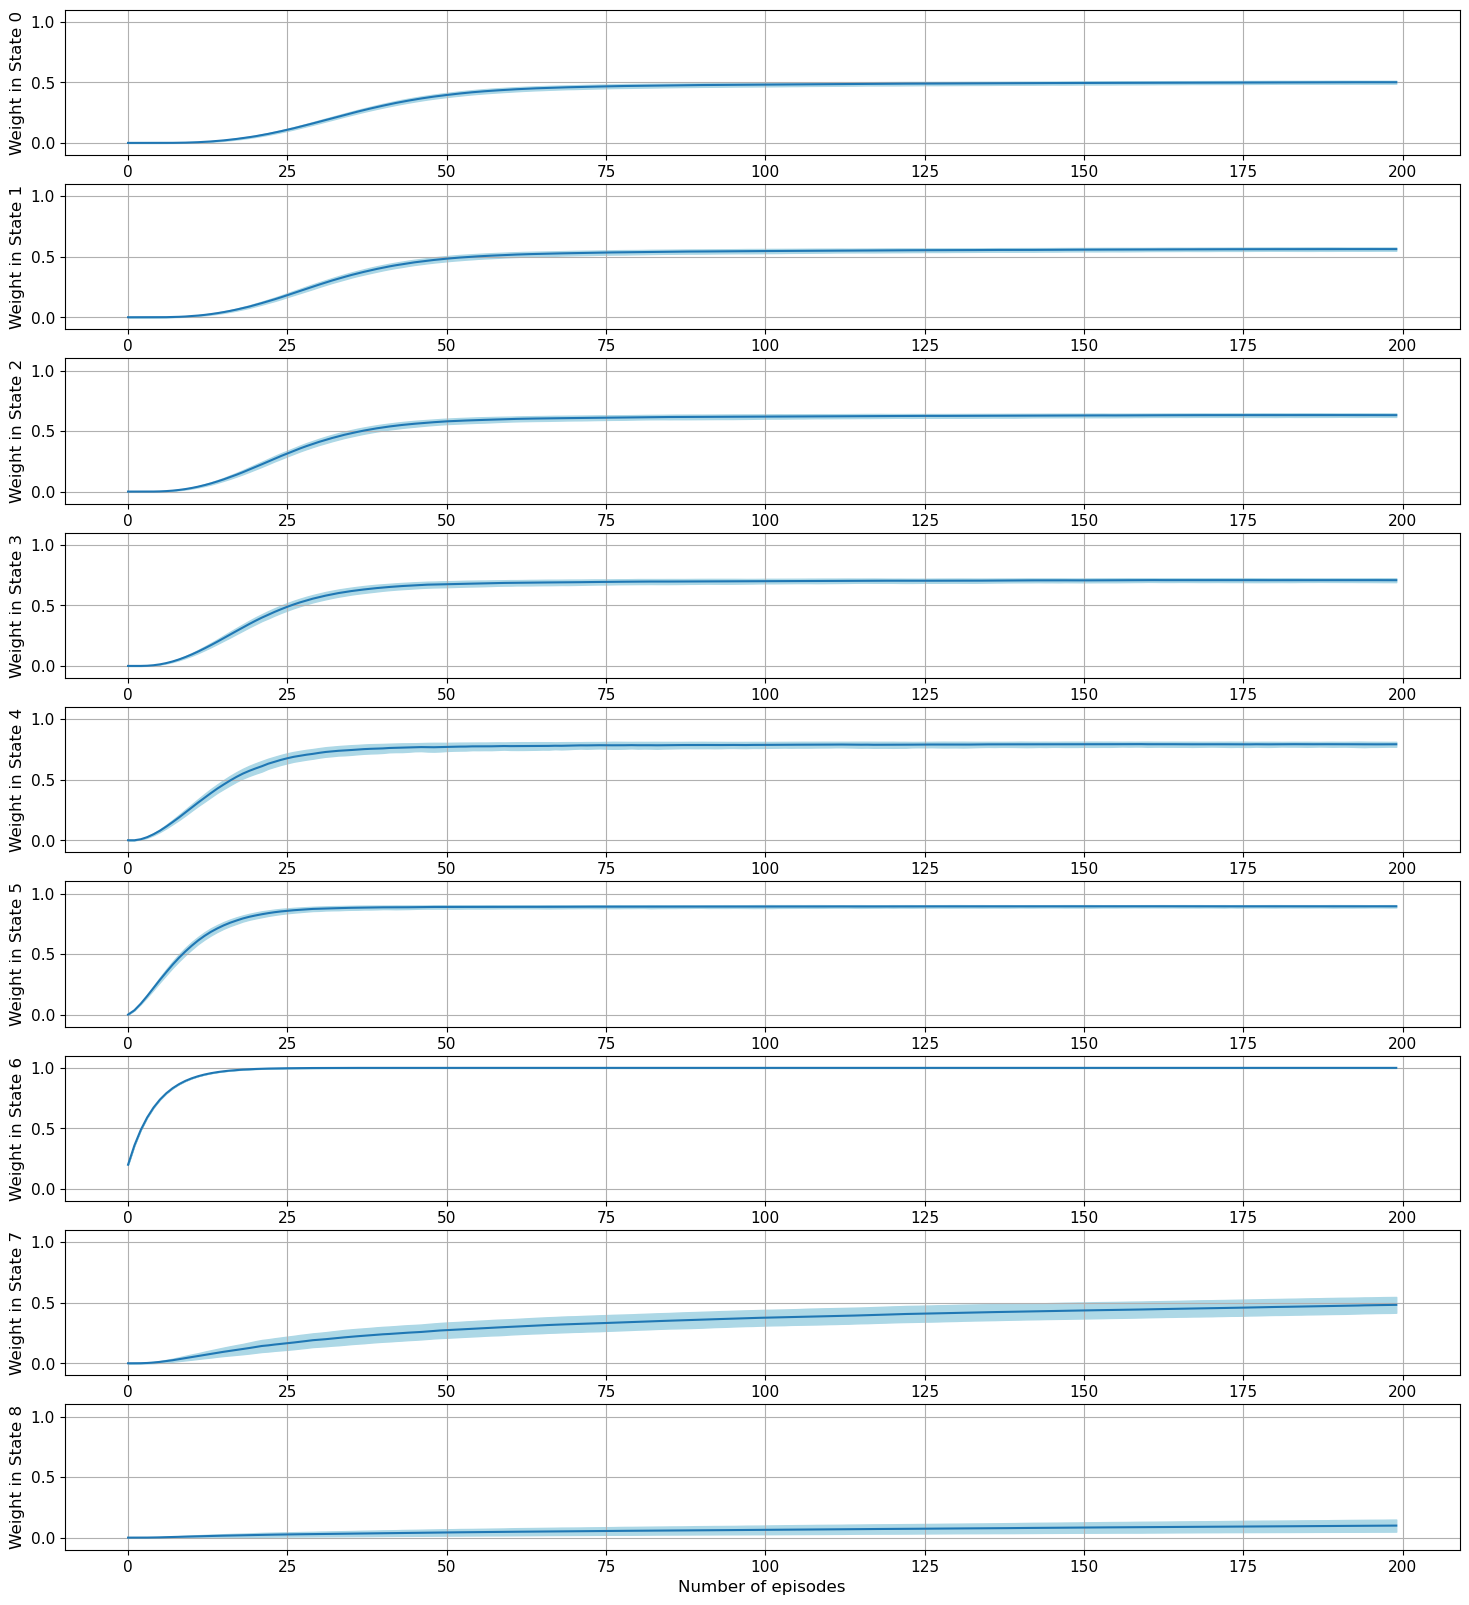

In [7]:
n_std=1
fig, axs = plt.subplots(9,1,figsize=(18,20))
episodes=np.arange(n_episodes)

for s,ax in enumerate(axs):
        ax.plot(episodes,mean_weights_ideal[s],label='LR=0.2, T=0.3',c='C0')

        ax.grid(True)
        ax.fill_between(episodes,mean_weights_ideal[s]-n_std*std_weights_ideal[s], mean_weights_ideal[s]+n_std*std_weights_ideal[s], color='lightblue')
        ax.set_ylim([-0.1,1.1])
        ax.set_ylabel(f"Weight in State {s}")                
        ax.set_xlabel(f"Number of episodes")
        # ax.legend(loc='upper right')



### Emulation

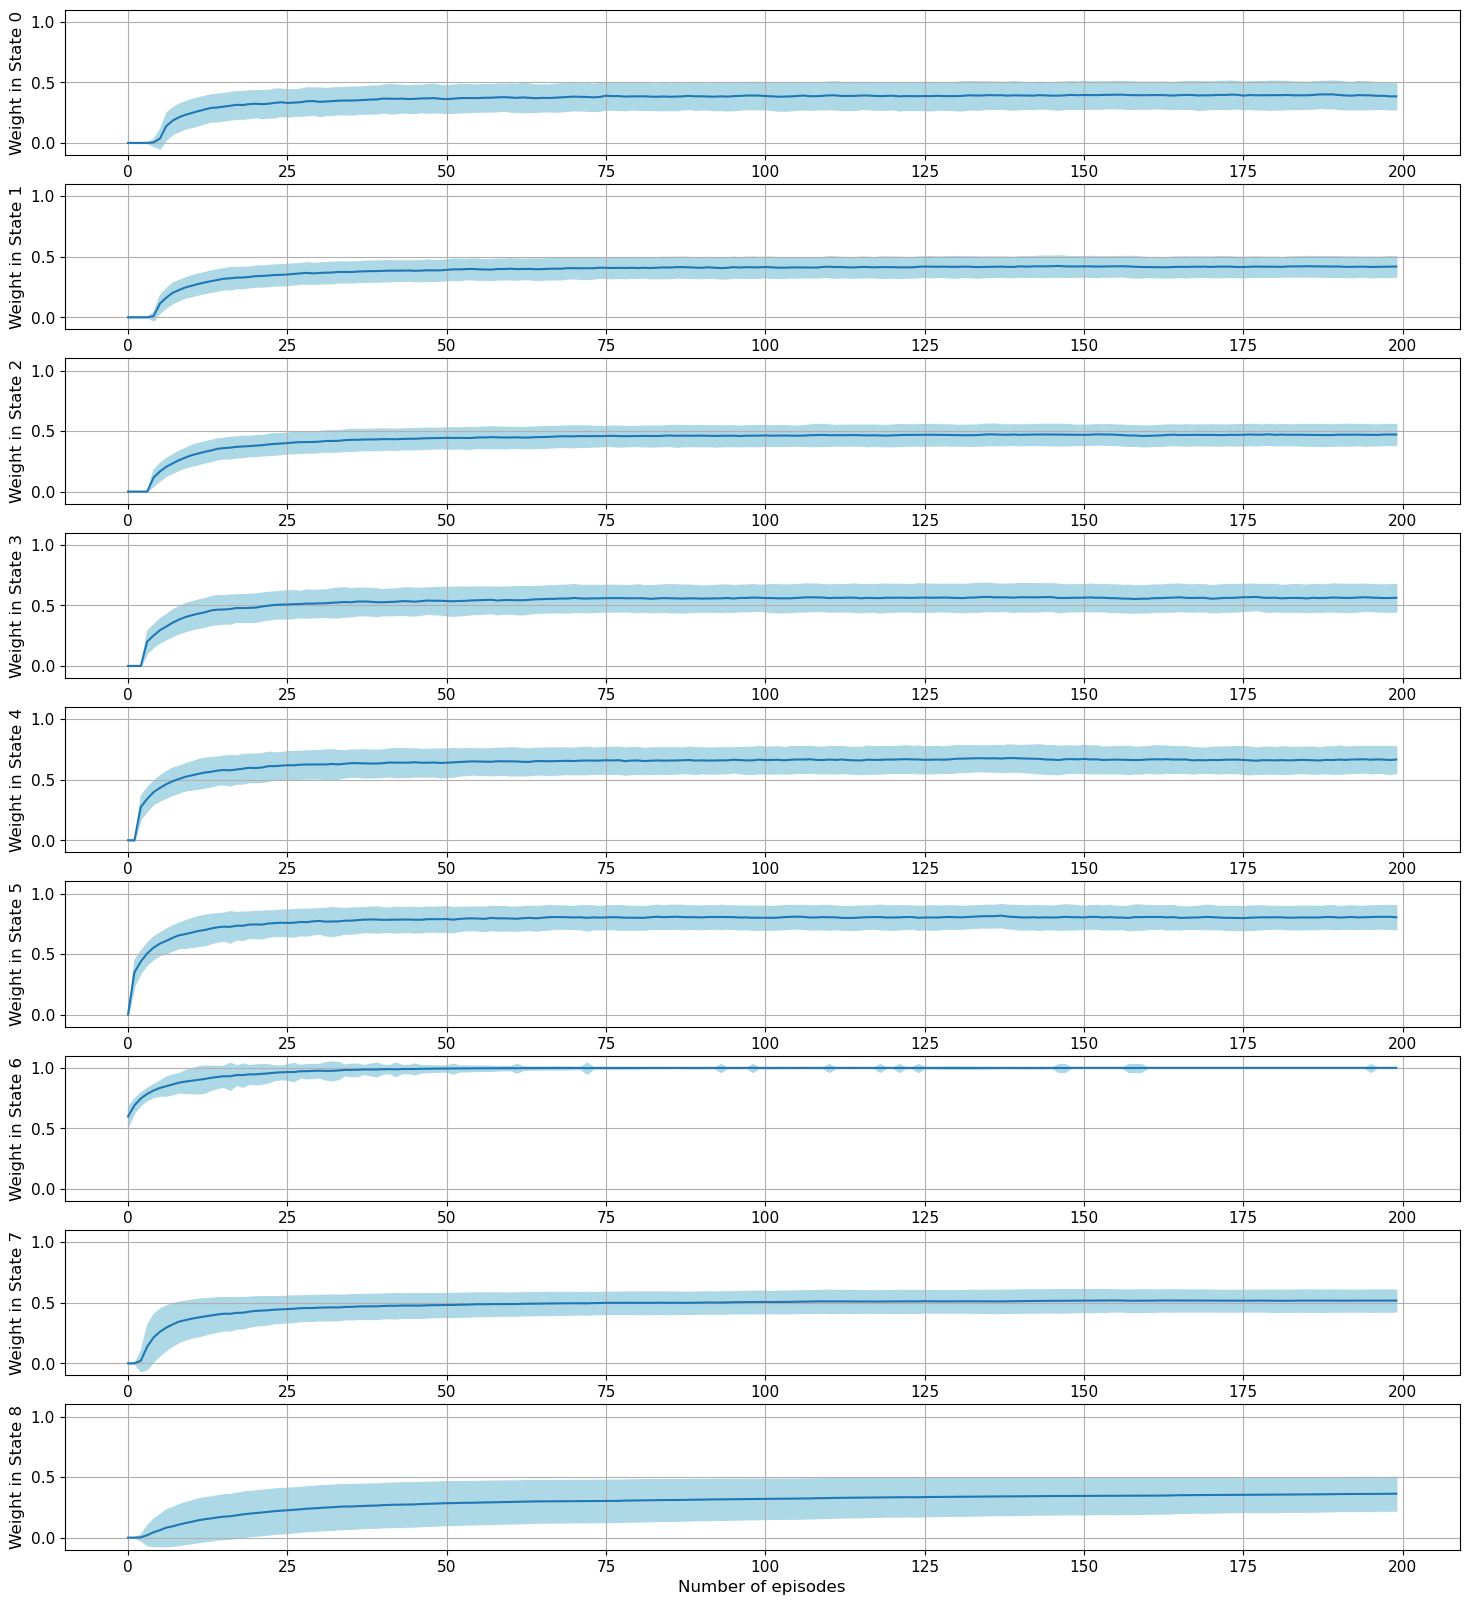

In [8]:
n_std=1
fig, axs = plt.subplots(9,1,figsize=(18,20))
episodes=np.arange(n_episodes)

for s,ax in enumerate(axs):
        ax.plot(episodes,mean_weights[s],label='LR=0.2, T=0.3',c='C0')

        ax.grid(True)
        ax.fill_between(episodes,mean_weights[s]-n_std*std_weights[s], mean_weights[s]+n_std*std_weights[s], color='lightblue')
        ax.set_ylim([-0.1,1.1])
        ax.set_ylabel(f"Weight in State {s}")                
        ax.set_xlabel(f"Number of episodes")
        # ax.legend(loc='upper right')



## Plot number of steps to reward

### Ideal

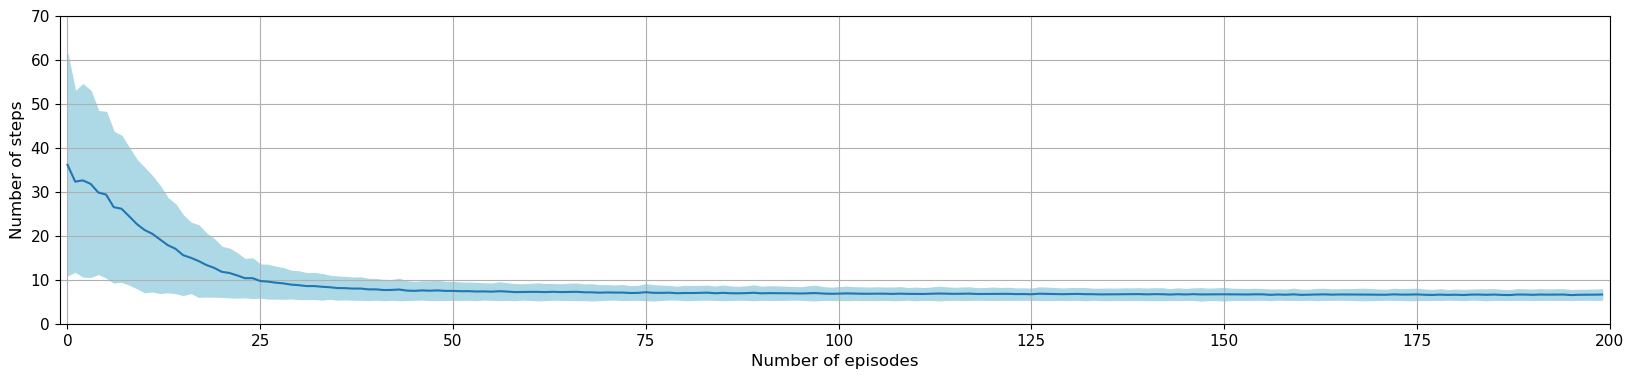

In [11]:
n_std=1
fig, ax = plt.subplots(figsize=(20,4))
episodes=np.arange(n_episodes)
ax.plot(episodes,mean_steps_ideal,c='C0')
ax.fill_between(episodes,mean_steps_ideal-n_std*std_steps_ideal, mean_steps_ideal+n_std*std_steps_ideal, color='lightblue')
plt.xlim([-1,n_episodes])
plt.ylim([0,70])
plt.grid()
plt.xlabel('Number of episodes')
plt.ylabel('Number of steps')

plt.show()

### Emulation

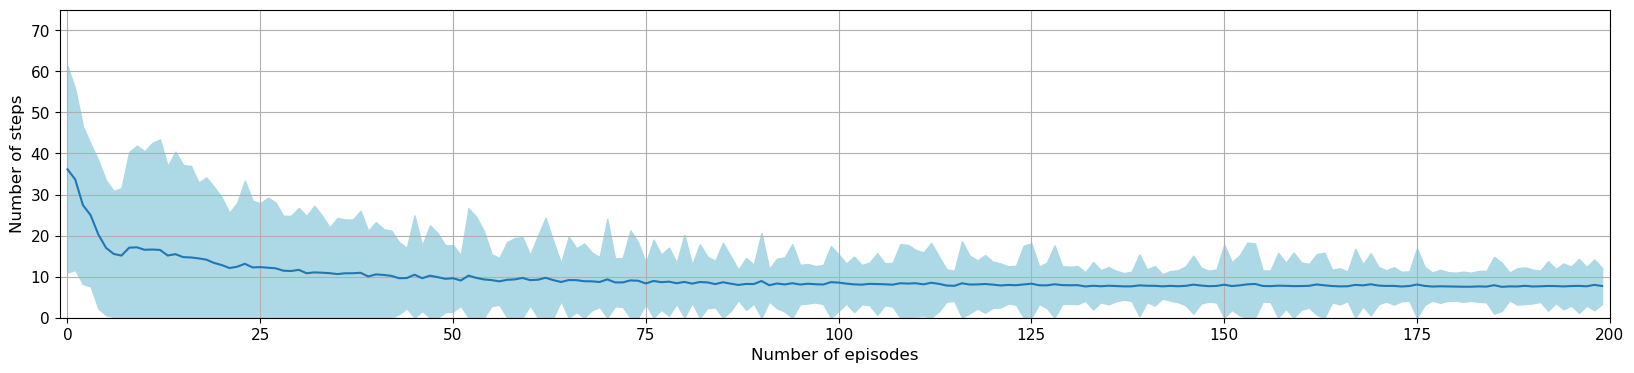

In [ ]:
n_std=1

fig, ax = plt.subplots(figsize=(20,4))
episodes=np.arange(n_episodes)
ax.plot(episodes,mean_steps,c='C0')
ax.fill_between(episodes,np.clip(mean_steps-n_std*std_steps,0,100), np.clip(mean_steps+n_std*std_steps,0,100), color='lightblue')
plt.xlim([-1,n_episodes])
plt.ylim([0,70])
plt.grid()
plt.xlabel('Number of episodes')
plt.ylabel('Number of steps')

plt.show()